Column Details:

1. **age**: Age of the individual purchasing medical insurance.  
2. **sex**: Gender of the individual (male or female).  
3. **bmi**: Body Mass Index of the individual, a measure of body fat based on height and weight.  
4. **children**: Number of dependent children covered by the insurance.  
5. **smoker**: Smoking status of the individual (yes or no).  
6. **region**: Geographic region of the individual (e.g., northwest, southeast).  
7. **charges**: Total medical insurance premium charged to the individual.

In [1]:
#importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

* We have 1334 rows and 7 columns
* Below are the names of the columns we will be working with

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   bmi       1328 non-null   int64  
 3   children  1328 non-null   int64  
 4   smoker    1328 non-null   object 
 5   region    1328 non-null   object 
 6   charges   1328 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 83.0+ KB


In [5]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Lukily no null vlaues.

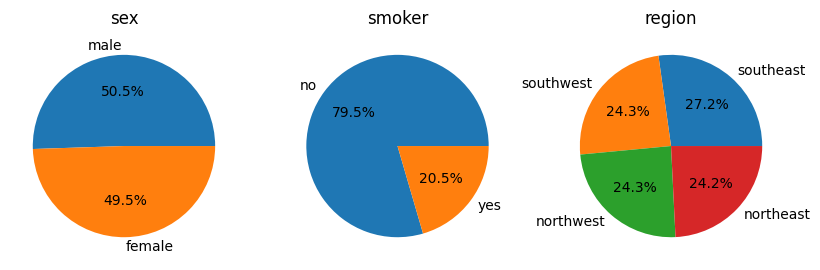

In [8]:
# pie plots for sex, smoker and region to understand their numbers
features = ['sex','smoker','region']
plt.figure(figsize = (10,5))
i=0
for col in features:
    i+=1
    plt.subplot(1, 3, i)
    x = df[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
    plt.title(col)
plt.show()

* We can see the sex is distributed almost equally
* Smoker is in the ratio 80:20
* Region wise they all are distributed adequately.

<Axes: xlabel='sex'>

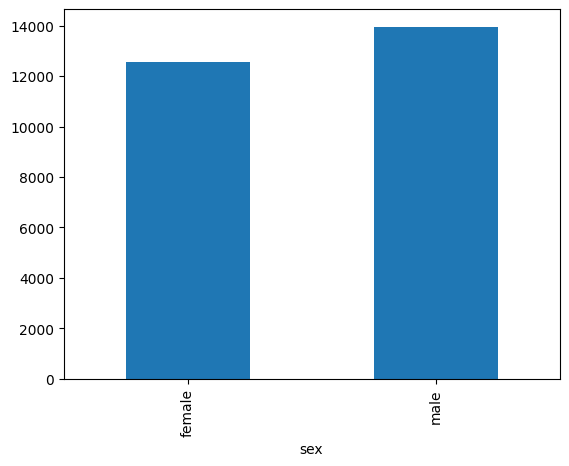

In [13]:
# df.groupby('sex')['charges'].mean().astype(float).plot.bar()

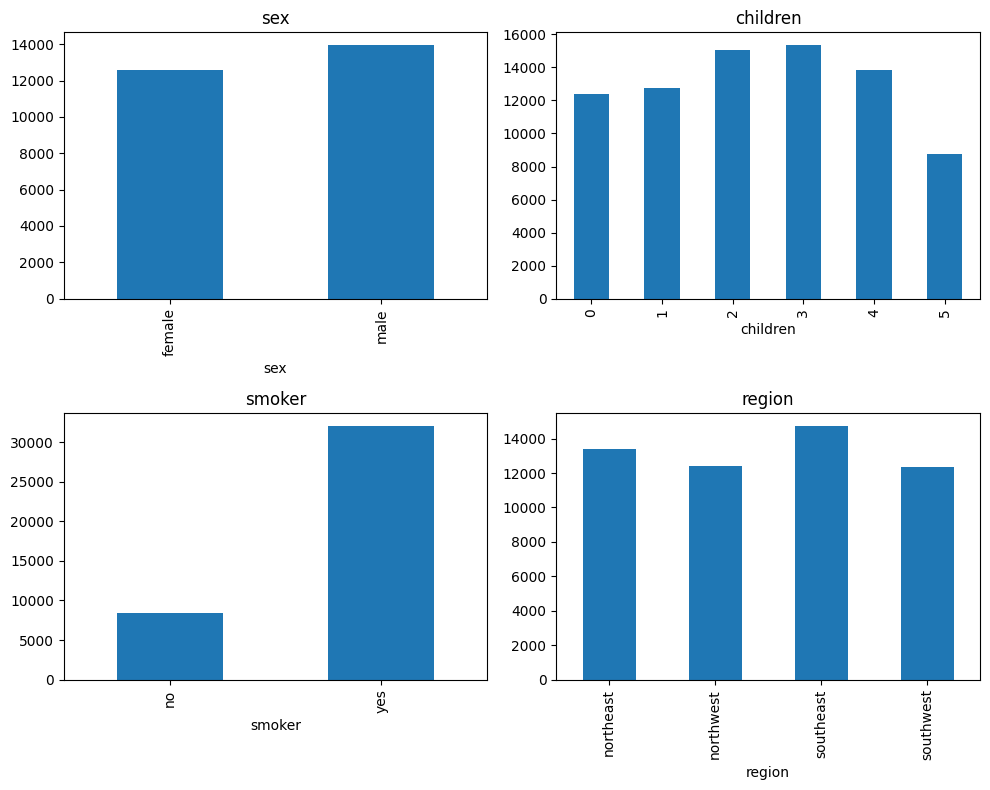

In [14]:
features = ['sex', 'children', 'smoker', 'region']
plt.figure(figsize=(10,8))
i=0
for col in features:
    i+=1
    plt.subplot(2, 2, i)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
    plt.title(col)
plt.tight_layout()
plt.show()

* We can observe the distribution of charges among the following columns.
* The chages applied for 2 and 3 childern is the most.
* Charges are slighlty on the higher side of males
* Premium charged for smokers is more than 3 times than a non smoker.
* Charges are approximately same in the given four regions.


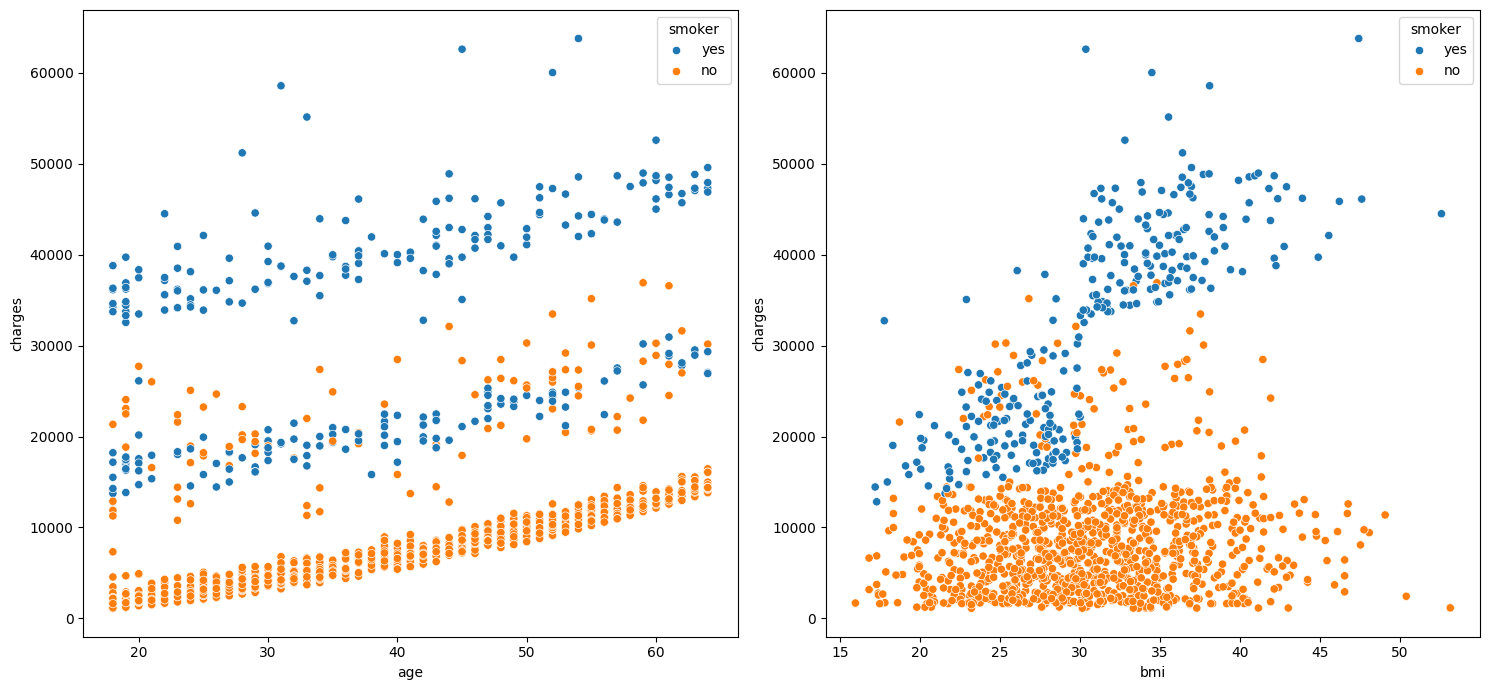

In [22]:
features = ['age', 'bmi']

plt.figure(figsize=(15, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col, y='charges', hue='smoker')
plt.tight_layout()
plt.show()

* We can see there is a clearn elevation as the age increases the premium charged increased gradually.
* We can also see that the premium paid by the smokers are way more than non smokers.


In [23]:
# Let's check for duplicated values
df.duplicated().sum()

1

* We have one let's remove it.

In [24]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(1338, 7)
(1337, 7)


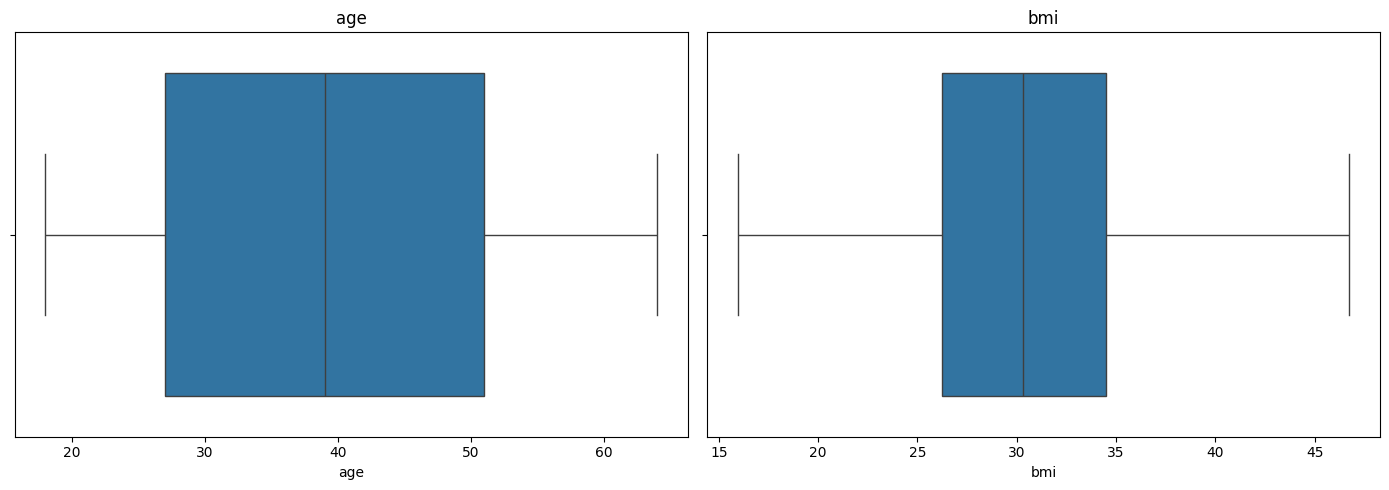

In [44]:
# Let's check if we have any outliers in 'age' and 'bmi'

features = ['age','bmi']
plt.figure(figsize=(14, 5))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

*   We have few outliers in bmi columns.
* Let's get rid of those.

In [43]:
# Let's remove outliers using IQR method
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(df.shape)
df = df[(df['bmi'] >= lower) & (df['bmi'] <= upper)]
print(df.shape)

(1337, 7)
(1328, 7)


* Outliers have been removed.

**Data Wrangling**
* Let's check the skewness of those columns to make sure it follows normal or standatd distribution.

In [45]:
print(df['bmi'].skew())
print(df['age'].skew())

0.15714074884049561
0.057520907909550154


* Data distributed across both columns are almost normal which is good for building the model.

In [51]:
# Let's encode the data from categorical to numerical using LabelEncoding
from sklearn.preprocessing import LabelEncoder

for col in ['sex','smoker','region']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
print(df.head())

   age  sex  bmi  children  smoker  region      charges
0   19    0  197         0       1       3  16884.92400
1   18    1  350         1       0       2   1725.55230
2   28    1  331         3       0       2   4449.46200
3   33    1   73         0       0       1  21984.47061
4   32    1  223         0       0       1   3866.85520


* We can see that all the columns are in numerical format, now it is ready to be fed to the ML models.

In [50]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')